<a href="https://colab.research.google.com/github/Tonry12/data_science_bootcamp_8_tonnaw/blob/main/Project1_66_Bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="300">

## Due Date: Sunday, October 1, 2023
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

## List team members:

1. นางสาวกรวรรณ อู่จอหอ        643020495-5 <korrawan.o@kkumail.com>
2. นางสาวขวัญสวรรค์ ทองประเสริฐ 643020498-9 <kwansawan.t@kkumail.com>
3. นายธนบดี ภูชมศรี             643020502-4 <thanabodee.p@kkumail.com>
4. นายศิริโชค ศิริวิชา            643020522-8 sirichok.s@kkumail.com


**NOTE1**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost

**NOTE2**: Create a slide presentation once finished, convert to pdf format, and turn in by one group member only
<br>A list of documents to turn in: 1) Jupyter notebook containing results and 2) A set of slides in pdf format

In [ ]:
# Load these libraries
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.
Most Twitter datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```

#### Read JSON file

In [ ]:
# read the file
from google.colab import drive
drive.mount('/content/drive')
file = open('/content/drive/MyDrive/warehouse/thailand_tweets.txt','r') # rename
thailand_twt = file.read()
thai_twt = json.loads(thailand_twt)
thai = json.loads(thailand_twt)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# inspect the file
type(thai)

str

In [ ]:
thai_json = json.loads(thai)
thai_json

{'1564764893038882816': {'tweet_id': '1564764893038882816',
  'username': 'matthunter',
  'name': 'MATT HUNTΞR',
  'profile_picture': 'https://twitter.com/matthunter/photo',
  'replies': 2,
  'retweets': 1,
  'likes': 7,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:57+00:00',
  'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
  'hashtags': [],
  'mentions': [],
  'images': [],
  'videos': [],
  'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
  'link': ''},
 '1564764866598080513': {'tweet_id': '1564764866598080513',
  'username': 'DavSmithVP',
  'name': 'DavSmith / Virtual Photography',
  'profile_picture': 'https://twitter.com/DavSmithVP/photo',
  'replies': 0,
  'retweets': 0,
  'likes': 2,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:50+00:00',
  'content': 'Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics',
  'hashtags': ['Virtua

In [ ]:
thai_json.keys()

dict_keys(['1564764893038882816', '1564764866598080513', '1564764845685280772', '1564764710804897792', '1564764468277612549', '1564764445825458181', '1564764361742110720', '1564764274098323456', '1564764028014313472', '1564763907700531202', '1564763775403712513', '1564763746463105026', '1564763729967054848', '1564763679232405504', '1564763673662464003', '1564763553130655744', '1564763407818952705', '1564763389058027521', '1564763303989366784', '1564763292354355200', '1564763185244426240', '1564763141589897217', '1564763050477244417', '1564762341324992513', '1564762335192940544', '1564762170277052418', '1564762027507458049', '1564761944061382656', '1564761905410875392'])

In [ ]:
first_key = list(thai_json.keys())[0]
thai_json[first_key]

{'tweet_id': '1564764893038882816',
 'username': 'matthunter',
 'name': 'MATT HUNTΞR',
 'profile_picture': 'https://twitter.com/matthunter/photo',
 'replies': 2,
 'retweets': 1,
 'likes': 7,
 'is_retweet': False,
 'posted_time': '2022-08-30T23:59:57+00:00',
 'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
 'hashtags': [],
 'mentions': [],
 'images': [],
 'videos': [],
 'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
 'link': ''}

In [ ]:
thai_json[first_key].keys()

dict_keys(['tweet_id', 'username', 'name', 'profile_picture', 'replies', 'retweets', 'likes', 'is_retweet', 'posted_time', 'content', 'hashtags', 'mentions', 'images', 'videos', 'tweet_url', 'link'])

In [ ]:
thai_json[first_key]['tweet_id']

'1564764893038882816'

#### Pretty print json/dict object

In [ ]:
pprint.pprint(thai_json)

{'1564761905410875392': {'content': 'Tinggal cari duitnya aja ini mah kalo di '
                                    'Thailand bisa pake Qris',
                         'hashtags': [],
                         'images': [],
                         'is_retweet': False,
                         'likes': 0,
                         'link': '',
                         'mentions': [],
                         'name': '',
                         'posted_time': '2022-08-30T23:48:04+00:00',
                         'profile_picture': 'https://twitter.com/moanfIeur/photo',
                         'replies': 0,
                         'retweets': 0,
                         'tweet_id': '1564761905410875392',
                         'tweet_url': 'https://twitter.com/moanfIeur/status/1564761905410875392',
                         'username': 'moanfIeur',
                         'videos': []},
 '1564761944061382656': {'content': 'Padahal berharap pertama lawan Thailand '
                     

In [ ]:
import pandas as pd
from io import StringIO

In [ ]:
df = pd.read_json(thai)
df.head()

,2019-08-02 16:54:53.038882816,2019-08-02 16:54:26.598080513,2019-08-02 16:54:05.685280772,2019-08-02 16:51:50.804897792,2019-08-02 16:47:48.277612549,2019-08-02 16:47:25.825458181,2019-08-02 16:46:01.742110720,2019-08-02 16:44:34.098323456,2019-08-02 16:40:28.014313472,2019-08-02 16:38:27.700531202,...,2019-08-02 16:28:12.354355200,2019-08-02 16:26:25.244426240,2019-08-02 16:25:41.589897217,2019-08-02 16:24:10.477244417,2019-08-02 16:12:21.324992513,2019-08-02 16:12:15.192940544,2019-08-02 16:09:30.277052418,2019-08-02 16:07:07.507458049,2019-08-02 16:05:44.061382656,2019-08-02 16:05:05.410875392
tweet_id,1564764893038882816,1564764866598080513,1564764845685280772,1564764710804897792,1564764468277612549,1564764445825458181,1564764361742110720,1564764274098323456,1564764028014313472,1564763907700531202,...,1564763292354355200,1564763185244426240,1564763141589897217,1564763050477244417,1564762341324992513,1564762335192940544,1564762170277052418,1564762027507458049,1564761944061382656,1564761905410875392
username,matthunter,DavSmithVP,DailyPattaya,Bryan62766077,Megan_and_Grrr,OhmPawatInter,nato_tonyo11,ThThitikarn61,Livetradingnews,DiscoverSoc,...,LDN327,Jay_beebee,Iovelydoll,jaemmrchv,Zeepruk_jfc,NFTLadyEve,AntzAntz1,taraxacumyx,IrfanHazard10,moanfIeur
name,MATT HUNTΞR,DavSmith / Virtual Photography,The Pattaya Daily,Bryan,Megan,OhmPawat International,nutri(BUSY SI ENGR.)| SoliD,thiti,Knightly News,Discover Society,...,LDN327,Jay Bee,,wonyoungiii | surprise cutie,ZeePruk_JapanFC（Rest）,NFTeVe,palito..showcase,Dandelion,Irfan Rapiansyah,
profile_picture,https://twitter.com/matthunter/photo,https://twitter.com/DavSmithVP/photo,https://twitter.com/DailyPattaya/photo,https://twitter.com/Bryan62766077/photo,https://twitter.com/Megan_and_Grrr/photo,https://twitter.com/OhmPawatInter/photo,https://twitter.com/nato_tonyo11/photo,https://twitter.com/ThThitikarn61/photo,https://twitter.com/Livetradingnews/photo,https://twitter.com/DiscoverSoc/photo,...,https://twitter.com/LDN327/photo,https://twitter.com/Jay_beebee/photo,https://twitter.com/Iovelydoll/photo,https://twitter.com/jaemmrchv/photo,https://twitter.com/Zeepruk_jfc/photo,https://twitter.com/NFTLadyEve/photo,https://twitter.com/AntzAntz1/photo,https://twitter.com/taraxacumyx/photo,https://twitter.com/IrfanHazard10/photo,https://twitter.com/moanfIeur/photo
replies,2,0,0,1,0,0,0,0,0,0,...,1,1,0,0,2,1,0,1,0,0


In [ ]:
pd_thai = pd.read_json(StringIO(thai), orient='index').head()
pd_thai

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,


In [ ]:
tweetid = " ".join([thai_json[key]['tweet_id'] for key in thai_json.keys()])
print(tweetid)

1564764893038882816 1564764866598080513 1564764845685280772 1564764710804897792 1564764468277612549 1564764445825458181 1564764361742110720 1564764274098323456 1564764028014313472 1564763907700531202 1564763775403712513 1564763746463105026 1564763729967054848 1564763679232405504 1564763673662464003 1564763553130655744 1564763407818952705 1564763389058027521 1564763303989366784 1564763292354355200 1564763185244426240 1564763141589897217 1564763050477244417 1564762341324992513 1564762335192940544 1564762170277052418 1564762027507458049 1564761944061382656 1564761905410875392


#### Pretty print json/dict object

Possible approaches:
* In fact, `pandas` has `pandas.read_json(<file_dir>)` function to read json file into dataframe
* As we create a data dict, we can also read our data dict into a pandas dataframe

In [ ]:
pd.read_json(file)

ValueError: ignored

### Your report
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
    * You are free to define your own popularity metric
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
# ----------------- Your code here -----------------



Note: ไม่ต้องรายงานส่วนนี้ในสไลด์

## Problem 2 Study Trip Advisor Hotel Reviews Sentiment

We are working with the Trip Advisor Hotel Reviews dataset. You can see the source from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews.

* Analyze the data to find out what make a hotel good or bad
<br>You may create a tag of "positive", "negative", or "neural" sentiment first. After tagging each tweet with different sentiment, we can separate positive tweets and negative tweets. Then, it is easier to find our common patterns in positive tweets or good hotels, and vice versa.

In [ ]:
#----------------------------------------------
# Your code starts here
# label each tweet as positive, negative, and neural sentiment
# combine tweet texts in each type
# tokenize texts
# convert to lower case
# remove stop words
# remove any other stop words, like RT
# remove punctuations
# remove other symbols?
# analyze word frequency in each sentiment type and so on
# create some data visualization for the analysis and your presentation





In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive # เชื่อมบัญชีกับ google drive
drive.mount('/content/drive') # เช็คว่าเชื่อมติดหรือไม่
tripadvisor = pd.read_csv('/content/drive/MyDrive/warehouse/tripadvisor_hotel_reviews.csv')

Mounted at /content/drive


In [3]:
tripadvisor.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
# label each tweet as positive, negative, and neural sentiment
def rating(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [5]:
tripadvisor['Rating'] = tripadvisor['Rating'].apply(rating)
tripadvisor.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Neutral
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive


In [6]:
tripadvisor.dtypes

Review    object
Rating    object
dtype: object

In [7]:
tripadvisor.isna().sum()

Review    0
Rating    0
dtype: int64

In [8]:
#summary
tripadvisor['Rating'].value_counts()

Positive    15093
Negative     3214
Neutral      2184
Name: Rating, dtype: int64

In [13]:
import nltk

In [14]:
import urllib.request

In [15]:
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
import re
from wordcloud import WordCloud
from textblob import TextBlob
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
#function for removing the punctuations
def remove_punctuation(tripadvisor):
    punctuationfree="".join([i for i in tripadvisor if i not in string.punctuation])
    return punctuationfree

In [17]:
tripadvisor['Review']= tripadvisor['Review'].apply(lambda x:remove_punctuation(x))
tripadvisor.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4 experience hotel monaco seatt...,Neutral
3,unique great stay wonderful time hotel monaco ...,Positive
4,great stay great stay went seahawk game awesom...,Positive


In [18]:
#Lower casing
tripadvisor['Review']= tripadvisor['Review'].apply(lambda x: x.lower())
tripadvisor.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4 experience hotel monaco seatt...,Neutral
3,unique great stay wonderful time hotel monaco ...,Positive
4,great stay great stay went seahawk game awesom...,Positive


In [20]:
# tokenize texts
tripadvisor['Review']=tripadvisor['Review'].astype(str)
def tokenize_review(review):
    tokens = word_tokenize(review)
    return tokens
tripadvisor['tokens'] = tripadvisor['Review'].apply(tokenize_review)
tripadvisor.head()

,Review,Rating,tokens
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4 experience hotel monaco seatt...,Neutral,"[nice, rooms, not, 4, experience, hotel, monac..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game..."


In [21]:
#Removing Stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tripadvisor):
    output= [i for i in tripadvisor if i not in stopwords]
    return output
tripadvisor['tokens']= tripadvisor['tokens'].apply(lambda x:remove_stopwords(x))
tripadvisor.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,Rating,tokens
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4 experience hotel monaco seatt...,Neutral,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game..."


In [22]:
#Stemming
porter_stemmer = PorterStemmer()
def stemming(tripadvisor):
    stem_tripadvisor = [porter_stemmer.stem(word) for word in tripadvisor]
    return stem_tripadvisor
tripadvisor['stem']=tripadvisor['tokens'].apply(lambda x: stemming(x))
tripadvisor.head()

,Review,Rating,tokens,stem
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s..."
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi..."
2,nice rooms not 4 experience hotel monaco seatt...,Neutral,"[nice, rooms, 4, experience, hotel, monaco, se...","[nice, room, 4, experi, hotel, monaco, seattl,..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


In [23]:
#Lemmatization
nltk.download('wordnet')
nltk.download('punkt')
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(tripadvisor):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in tripadvisor]
    return lemm_text
tripadvisor['lemmatize']=tripadvisor['stem'].apply(lambda x:lemmatizer(x))
tripadvisor.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Review,Rating,tokens,stem,lemmatize
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...","[nice, hotel, expens, park, got, good, deal, s..."
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi...","[ok, noth, special, charg, diamond, member, hi..."
2,nice rooms not 4 experience hotel monaco seatt...,Neutral,"[nice, rooms, 4, experience, hotel, monaco, se...","[nice, room, 4, experi, hotel, monaco, seattl,...","[nice, room, 4, experi, hotel, monaco, seattl,..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...","[uniqu, great, stay, wonder, time, hotel, mona..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


In [24]:
#combine tweet texts in each type
pos = tripadvisor.loc[tripadvisor["Rating"] == "Positive", :]
neg = tripadvisor.loc[tripadvisor["Rating"] == "Negative", :]
neu = tripadvisor.loc[tripadvisor["Rating"] == "Neutral", :]

In [38]:
pos.head(5)


,Review,Rating,tokens,stem,lemmatize
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...","[nice, hotel, expens, park, got, good, deal, s..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...","[uniqu, great, stay, wonder, time, hotel, mona..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."
5,love monaco staff husband stayed hotel crazy w...,Positive,"[love, monaco, staff, husband, stayed, hotel, ...","[love, monaco, staff, husband, stay, hotel, cr...","[love, monaco, staff, husband, stay, hotel, cr..."
6,cozy stay rainy city husband spent 7 nights mo...,Positive,"[cozy, stay, rainy, city, husband, spent, 7, n...","[cozi, stay, raini, citi, husband, spent, 7, n...","[cozi, stay, raini, citi, husband, spent, 7, n..."


In [39]:
neg.head(5)


,Review,Rating,tokens,stem,lemmatize
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi...","[ok, noth, special, charg, diamond, member, hi..."
10,poor value stayed monaco seattle july nice hot...,Negative,"[poor, value, stayed, monaco, seattle, july, n...","[poor, valu, stay, monaco, seattl, juli, nice,...","[poor, valu, stay, monaco, seattl, juli, nice,..."
15,horrible customer service hotel stay february ...,Negative,"[horrible, customer, service, hotel, stay, feb...","[horribl, custom, servic, hotel, stay, februar...","[horribl, custom, servic, hotel, stay, februar..."
16,disappointed say anticipating stay hotel monac...,Negative,"[disappointed, say, anticipating, stay, hotel,...","[disappoint, say, anticip, stay, hotel, monaco...","[disappoint, say, anticip, stay, hotel, monaco..."
24,great location need internally upgrade advanta...,Negative,"[great, location, need, internally, upgrade, a...","[great, locat, need, intern, upgrad, advantag,...","[great, locat, need, intern, upgrad, advantag,..."


In [40]:
neu.head(5)

,Review,Rating,tokens,stem,lemmatize
2,nice rooms not 4 experience hotel monaco seatt...,Neutral,"[nice, rooms, 4, experience, hotel, monaco, se...","[nice, room, 4, experi, hotel, monaco, seattl,...","[nice, room, 4, experi, hotel, monaco, seattl,..."
13,nice hotel not nice staff hotel lovely staff q...,Neutral,"[nice, hotel, nice, staff, hotel, lovely, staf...","[nice, hotel, nice, staff, hotel, love, staff,...","[nice, hotel, nice, staff, hotel, love, staff,..."
19,hmmmmm say really high hopes hotel monaco chos...,Neutral,"[hmmmmm, say, really, high, hopes, hotel, mona...","[hmmmmm, say, realli, high, hope, hotel, monac...","[hmmmmm, say, realli, high, hope, hotel, monac..."
25,nt mind noise place great read reviews noise u...,Neutral,"[nt, mind, noise, place, great, read, reviews,...","[nt, mind, nois, place, great, read, review, n...","[nt, mind, nois, place, great, read, review, n..."
27,met expectations centrally located hotel block...,Neutral,"[met, expectations, centrally, located, hotel,...","[met, expect, central, locat, hotel, block, wa...","[met, expect, central, locat, hotel, block, wa..."


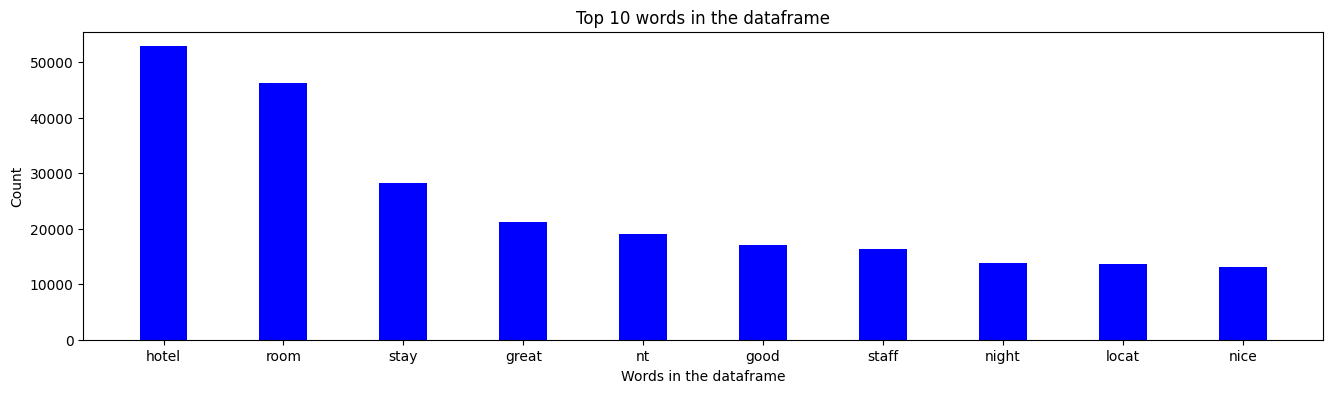

In [41]:
#Statistical Analysis
freq = {}
for i in tripadvisor['lemmatize']:
    for j in i:
        if j not in freq:
            freq[j] = 1
        else:
            freq[j] += 1
list(freq.items())[:25]
freq_df=pd.DataFrame(sorted(freq.items(),key=lambda x:x[1],reverse=True))
f1=freq_df[0][:10]
f2=freq_df[1][:10]
plt.figure(1,figsize=(16,4))
plt.bar(f1,f2,color ='blue',width = 0.4)
plt.xlabel("Words in the dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in the dataframe")
plt.savefig("wordfrequency.png")
plt.show()

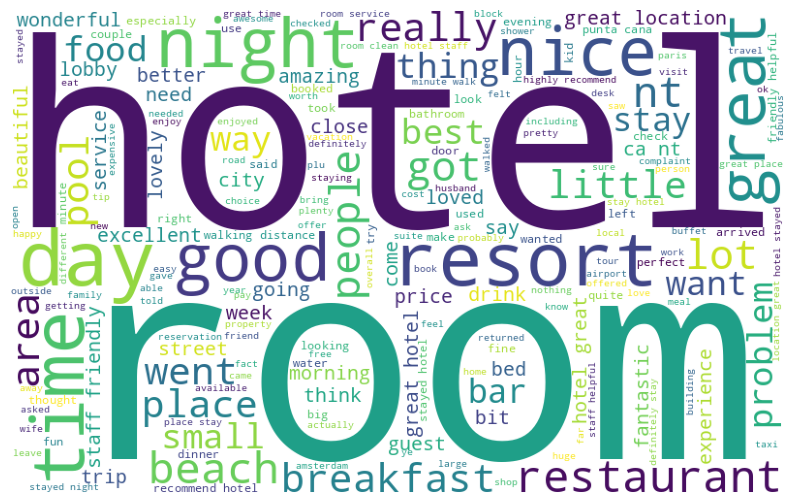

In [33]:
#Word Cloud of Positive
from wordcloud import WordCloud
wc = WordCloud(width=800,
               height=500,
               background_color='white',
               min_font_size=10)
wc.generate(''.join(pos['Review']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

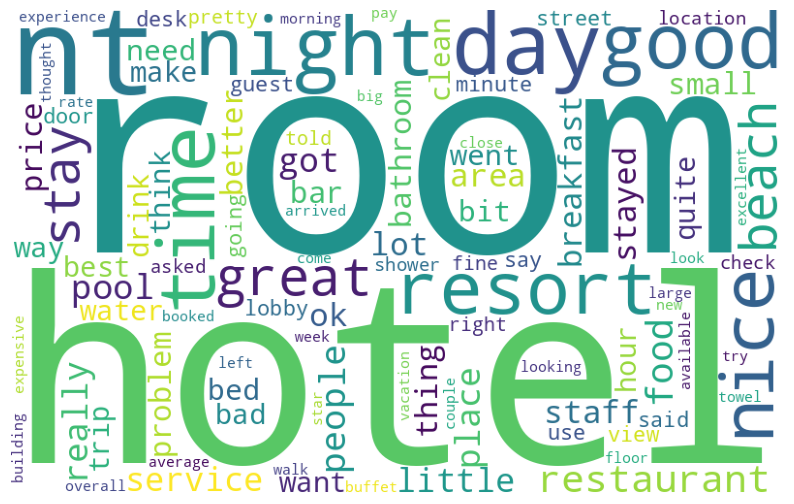

In [31]:
#Word Cloud of Neutral
from wordcloud import WordCloud
wc = WordCloud(width=800,
               height=500,
               background_color='white',
               min_font_size=10)
wc.generate(''.join(neu['Review']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

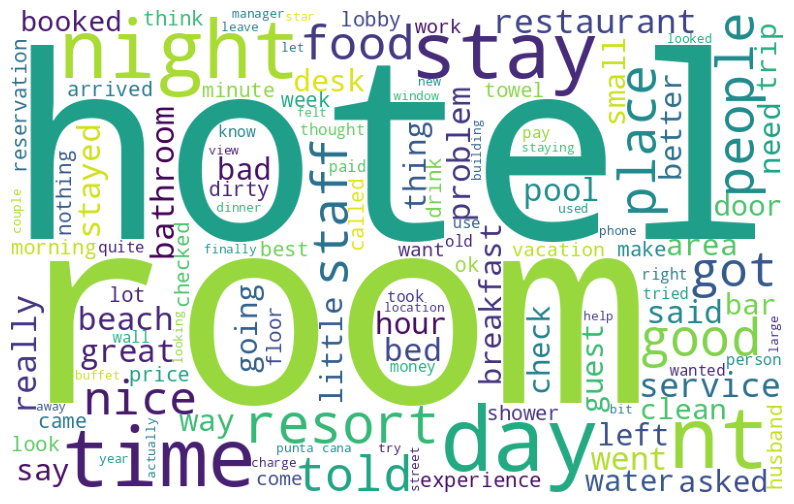

In [34]:
#Word Cloud of Negative
from wordcloud import WordCloud
wc = WordCloud(width=800,
               height=500,
               background_color='white',
               min_font_size=10)
wc.generate(''.join(neg['Review']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Report
* How did you analyze the data?
* What did you find in the data? (please include figures or tables in the report, but no source code)

## Problem 3 Collect and Analyze Your Interesting Topic

* Select a topic that your group members are interested
* Gather url from at least 3 webpages
* Use urllib.request to retrieve data from webpage
* Clean and find intersting patterns and information
* Create a word cloud of your topic

In [ ]:
#----------------------------------------------
# Your code starts here




### Report
* What did you find out about your topic? (please include figures or tables in the report, but no source code)

# ☃️ The End of Project 1 ☃️